<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/the-beauty-of-knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


1. data plotting and train/test sets 2/2
2. knn 3/3:


*
The reason why the accuracy went up to around 99% was because the response variable (price_bin) is included as a predictor

3. for loop 2/3:


*   
The dataset used in the loop is not correct: it includes
the response variable in the feature, which makes the error rate extremely low and the increase of error rate when k increases



4. standardizing predictors 2/2


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [ ]:
# INSERT CODE HERE
library(class)
library(tidyverse)

df = diamonds %>%
  mutate(price_bin = as.factor(ifelse(price > mean(price), 1, 0))) %>%
  select(carat, depth, table, x, y, price_bin)

head(df)
dim(df)


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

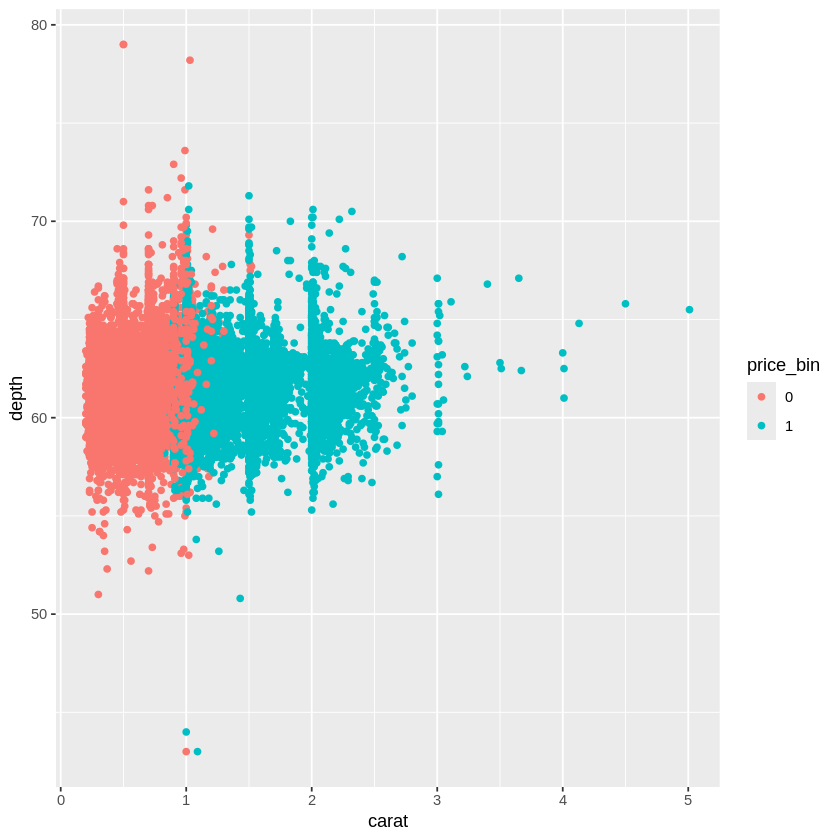

In [ ]:
# INSERT CODE HERE
df %>%
  ggplot(aes(x = carat, y = depth, color = price_bin)) + geom_point()

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> * *I think it will perform okay, depth doesn't seem particularly informative though since the same depth has quite a range*
>
> * *Carat will provide the most information about which price class the diamond belongs to.*


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)

# INSERT CODE HERE
nrow(df)*.3

test.inds <- sample(1:nrow(df),16182)

df$is.test <- 1:nrow(df) %in% test.inds

df_train <- df %>%
  filter(is.test == "FALSE")

df_test <- df %>%
  filter(is.test == "TRUE")

head(df_train)
dim(df_train)

head(df_test)
dim(df_test)

[1] 16182

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE
0.23,56.9,65,4.05,4.07,0,FALSE
0.29,62.4,58,4.20,4.23,0,FALSE
0.31,63.3,58,4.34,4.35,0,FALSE
0.24,62.8,57,3.94,3.96,0,FALSE
0.24,62.3,57,3.95,3.98,0,FALSE


[1] 37758     7

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.21,59.8,61,3.89,3.84,0,TRUE
0.30,64.0,55,4.25,4.28,0,TRUE
0.30,62.0,54,4.31,4.34,0,TRUE
0.30,63.4,54,4.23,4.29,0,TRUE
0.30,62.7,59,4.21,4.27,0,TRUE
0.23,63.8,55,3.85,3.92,0,TRUE


[1] 16182     7

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [ ]:

df_train.pred = df_train %>%
  select(carat, depth)

df_test.pred = df_test %>%
  select(carat, depth)

df_train.lab = df_train$price_bin

set.seed(2023)

knn_df = knn(df_train.pred, df_test.pred, df_train.lab, k = 3)



Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [ ]:
# INSERT CODE HERE

confusion_df = data.frame(predicted = knn_df, actual = df_test$price_bin)
table(confusion_df)

accuracy = mean(confusion_df$predicted == confusion_df$actual)
accuracy

error = 1 - accuracy
error

         actual
predicted    0    1
        0 9697  319
        1  549 5617

[1] 0.9463602

[1] 0.05363985

How did your model perform?
> * *Quite well, it performed with 95% accuracy and an error of 5%, more often than not when it was 1 it predicted 1 and when it was 0 it predicted 0.*
>
> *


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
df_train = df_train %>%
  select(-c(is.test))
df_test = df_test %>%
  select(-c(is.test))


In [ ]:
set.seed(2023)
# INSERT CODE HERE

knn_df2 = knn(df_train, df_test, df_train.lab, k = 3)

confusion_df2 = data.frame(predicted = knn_df2, actual = df_test$price_bin)
table(confusion_df2)

accuracy2 = mean(confusion_df2$predicted == confusion_df2$actual)
accuracy2

error2 = 1 - accuracy2
error2

         actual
predicted     0     1
        0 10237    10
        1     9  5926

[1] 0.9988259

[1] 0.001174144

Did your model predictions improve?
> * *Yes, the model went from 95% accuracy to 99% accuracy, error went from 5% to less than 1% error*


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
for (k in seq(1:30)) {
    knn_fits  <- knn(df_train, df_test, df_train.lab, k = k)

    # overall error
    conf_df  <- data.frame(predicted = knn_fits, actual = df_test$price_bin)
    output$error[k]  <- 1 - mean(conf_df$predicted == conf_df$actual)

}
head(output)

,k,error
,<int>,<dbl>
1,1,0.001050550
2,2,0.001235941
3,3,0.001174144
4,4,0.001297738
5,5,0.001359535
6,6,0.001235941


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


[1] 1

[1] 0.00105055

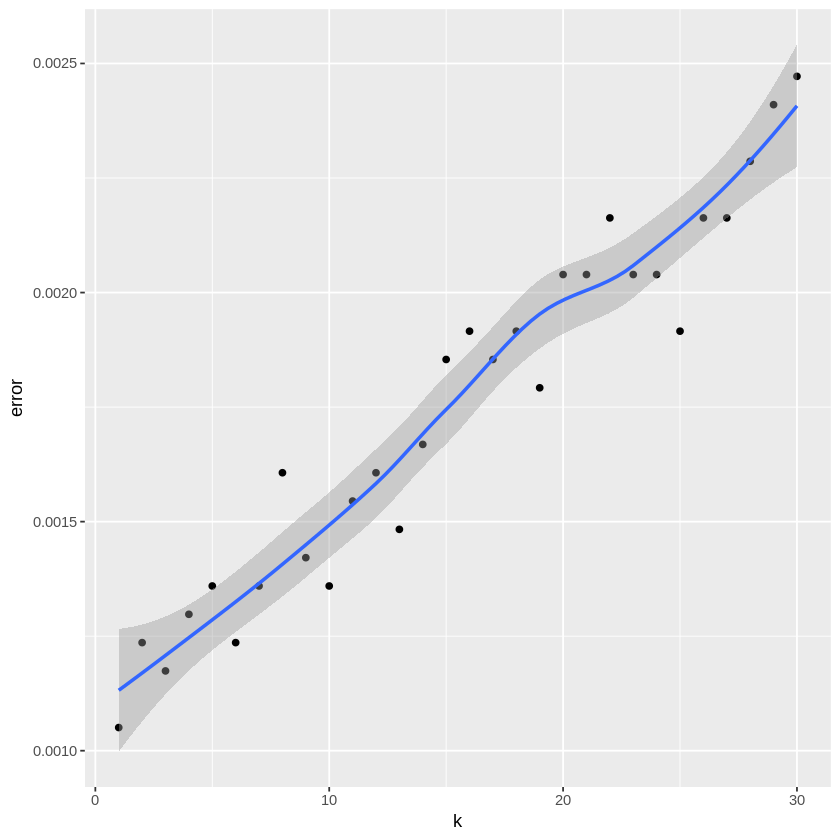

In [ ]:
# INSERT CODE HERE
output %>%
  ggplot(aes(x = k, y = error)) + geom_point() + geom_smooth()

best_k <- output$k[which.min(output$error)]
best_error <- min(output$error)
best_k
best_error

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * *Well, as k increases, so does the error so I would want the lowest k possible. But if I went with k = 1, I'd risk overfitting so I'm going to go with k = 3. Of the lower k values it's the lowest without going down to k=1 which is the same value we have been using*
>
> *


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
df_train.pred2 = df_train.pred %>%
  mutate(carat = scale(carat), depth = scale(depth))
df_test.pred2 = df_test.pred %>%
  mutate(carat = scale(carat), depth = scale(depth))
set.seed(2023)

knn_df3 = knn(df_train.pred2, df_test.pred2, df_train.lab, k = 3)

confusion_df3 = data.frame(predicted = knn_df3, actual = df_test$price_bin)
table(confusion_df3)

accuracy3 = mean(confusion_df3$predicted == confusion_df3$actual)
accuracy3

error3 = 1 - accuracy3
error3

         actual
predicted    0    1
        0 9719  323
        1  527 5613

[1] 0.9474725

[1] 0.0525275

What impact did rescaling the data have on your error rate?
> * *While they aren't notably different from each other, the rescaled error is slightly smaller than the initial error rate*


**DUE:** 11:59 pm March 19, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
